In [25]:
from matplotlib import pyplot as plt
import pandas as pd
import sys
sys.path.insert(0,"/Users/jin/Programming/Machine_Learning/All-about-Market/trading/Jeong/machine_trade/code")
import joblib
import model
import eval_model
import author
import numpy as np
processed_engine = author.processed_engine

In [5]:
total_df = pd.read_csv("total.csv")
df = pd.read_sql("SELECT * FROM BTCUSD_1d", processed_engine)

In [7]:
total_df

,time,BTC_Price,BTC_Gap,BTC_Rsi,BTC_Macd,BTC_Macd_Signal,BTC_Vwap,BTC_Volume,BTC_Fast_k,BTC_Fast_d,...,TLT_Fast_d,USDT_Price,USDT_Gap,USDT_Rsi,USDT_Macd,USDT_Macd_Signal,USDT_Vwap,USDT_Volume,USDT_Fast_k,USDT_Fast_d
0,2017-11-22,8253.549805,0.028084,68.346880,445.988842,519.541131,3921.269410,3633530112,6.293342,10.473278,...,-276.390668,1.000150,0.010688,37.588800,-0.001441,-0.002235,1.005206,4.998120e+08,5.322139,5.276805
1,2017-11-24,8253.690430,0.054557,66.270356,470.049094,514.700552,4003.453668,5058610176,10.954248,8.306206,...,-277.116082,1.002330,0.019358,47.062782,-0.001838,-0.002416,1.004272,8.486280e+08,10.357911,6.183127
2,2017-11-27,9818.349609,0.049786,78.260785,553.156253,708.616645,4171.184742,5653320192,14.625938,14.380541,...,-276.565486,1.001290,0.022085,45.820690,-0.001648,-0.001303,1.004365,7.844370e+08,9.836470,14.072735
3,2017-11-28,10058.799805,0.039995,79.556724,599.838524,786.567609,4245.917509,6348819968,9.238198,12.666427,...,-275.123357,1.000140,0.010473,44.352392,-0.001602,-0.001419,1.004122,7.947640e+08,12.721461,13.622220
4,2017-11-29,9888.610352,0.199600,76.098837,644.890859,825.100201,4373.479924,11568799744,6.625017,10.652623,...,-272.034415,0.990606,0.097143,34.486139,-0.001732,-0.002254,1.002662,1.672120e+09,37.689587,21.645748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,2022-03-16,41143.929688,0.062608,53.742454,-301.592263,-220.364789,27421.859568,39616916192,31.377967,18.756192,...,10.029340,1.000435,0.000327,52.572147,-0.000062,-0.000046,1.001104,7.467329e+10,33.977493,24.156793
1085,2022-03-17,40951.378906,0.015362,53.113774,-261.905324,-103.157570,27428.975770,22009601093,5.527594,14.346660,...,8.795566,1.000500,0.000375,54.335213,-0.000055,-0.000026,1.001104,5.291322e+10,35.402299,27.905295
1086,2022-03-18,41801.156250,0.046979,55.583244,-197.997152,57.635539,27440.788488,34421564942,28.791986,19.161768,...,8.278352,1.000483,0.000568,53.774312,-0.000046,-0.000012,1.001103,6.496932e+10,17.502032,24.437541
1087,2022-03-21,41077.996094,0.019336,52.563130,22.959662,277.569038,27462.332604,24615543271,8.567575,11.244483,...,7.325604,1.000347,0.000244,48.838219,-0.000022,0.000001,1.001101,6.482815e+10,5.689515,12.587091


In [6]:
df

,time,Price,Gap,Rsi,Macd,Macd_Signal,Vwap,Volume,Fast_k,Fast_d
0,2015-01-14,178.102997,0.305428,14.623696,-13.092559,-22.733852,251.031422,97638704,4.427062,5.319966
1,2015-01-15,209.843994,0.294917,29.526698,-15.493588,-25.097704,244.950846,81773504,22.827701,11.164776
2,2015-01-16,208.097000,0.109225,29.224329,-17.755485,-26.803072,242.560321,38421000,5.796438,9.373512
3,2015-01-17,199.259995,0.086496,27.680181,-19.912125,-28.538685,240.910015,23469700,3.446131,7.396380
4,2015-01-18,210.339005,0.124361,32.495837,-21.667595,-28.689473,239.486011,30085100,12.443029,9.079356
...,...,...,...,...,...,...,...,...,...,...
2723,2022-04-02,45868.949219,0.027211,60.630211,1406.053941,1609.957820,27627.294283,29336594194,1.165115,8.753685
2724,2022-04-03,46453.566406,0.036801,62.627575,1442.465904,1588.113754,27638.588425,25414397610,11.479368,9.662246
2725,2022-04-04,46622.675781,0.034381,63.209030,1467.251023,1566.391501,27653.141215,32499785455,19.427733,12.917409
2726,2022-04-05,45555.992188,0.034281,57.167251,1463.086910,1446.430458,27665.649039,29640604055,0.180110,8.671642


In [11]:
df = df[~df['time'].duplicated()]
df

,time,Price,Gap,Rsi,Macd,Macd_Signal,Vwap,Volume,Fast_k,Fast_d
0,2015-01-14,178.102997,0.305428,14.623696,-13.092559,-22.733852,251.031422,97638704,4.427062,5.319966
1,2015-01-15,209.843994,0.294917,29.526698,-15.493588,-25.097704,244.950846,81773504,22.827701,11.164776
2,2015-01-16,208.097000,0.109225,29.224329,-17.755485,-26.803072,242.560321,38421000,5.796438,9.373512
3,2015-01-17,199.259995,0.086496,27.680181,-19.912125,-28.538685,240.910015,23469700,3.446131,7.396380
4,2015-01-18,210.339005,0.124361,32.495837,-21.667595,-28.689473,239.486011,30085100,12.443029,9.079356
...,...,...,...,...,...,...,...,...,...,...
2723,2022-04-02,45868.949219,0.027211,60.630211,1406.053941,1609.957820,27627.294283,29336594194,1.165115,8.753685
2724,2022-04-03,46453.566406,0.036801,62.627575,1442.465904,1588.113754,27638.588425,25414397610,11.479368,9.662246
2725,2022-04-04,46622.675781,0.034381,63.209030,1467.251023,1566.391501,27653.141215,32499785455,19.427733,12.917409
2726,2022-04-05,45555.992188,0.034281,57.167251,1463.086910,1446.430458,27665.649039,29640604055,0.180110,8.671642


In [ ]:
df.set_index('time',inplace=True)

In [18]:
df

,Price,Gap,Rsi,Macd,Macd_Signal,Vwap,Volume,Fast_k,Fast_d
time,,,,,,,,,
2015-01-14,178.102997,0.305428,14.623696,-13.092559,-22.733852,251.031422,97638704,4.427062,5.319966
2015-01-15,209.843994,0.294917,29.526698,-15.493588,-25.097704,244.950846,81773504,22.827701,11.164776
2015-01-16,208.097000,0.109225,29.224329,-17.755485,-26.803072,242.560321,38421000,5.796438,9.373512
2015-01-17,199.259995,0.086496,27.680181,-19.912125,-28.538685,240.910015,23469700,3.446131,7.396380
2015-01-18,210.339005,0.124361,32.495837,-21.667595,-28.689473,239.486011,30085100,12.443029,9.079356
...,...,...,...,...,...,...,...,...,...
2022-04-02,45868.949219,0.027211,60.630211,1406.053941,1609.957820,27627.294283,29336594194,1.165115,8.753685
2022-04-03,46453.566406,0.036801,62.627575,1442.465904,1588.113754,27638.588425,25414397610,11.479368,9.662246
2022-04-04,46622.675781,0.034381,63.209030,1467.251023,1566.391501,27653.141215,32499785455,19.427733,12.917409


In [19]:
total_df.set_index('time',inplace=True)
total_df

,BTC_Price,BTC_Gap,BTC_Rsi,BTC_Macd,BTC_Macd_Signal,BTC_Vwap,BTC_Volume,BTC_Fast_k,BTC_Fast_d,QQQ_Price,...,TLT_Fast_d,USDT_Price,USDT_Gap,USDT_Rsi,USDT_Macd,USDT_Macd_Signal,USDT_Vwap,USDT_Volume,USDT_Fast_k,USDT_Fast_d
time,,,,,,,,,,,,,,,,,,,,,
2017-11-22,8253.549805,0.028084,68.346880,445.988842,519.541131,3921.269410,3633530112,6.293342,10.473278,151.023880,...,-276.390668,1.000150,0.010688,37.588800,-0.001441,-0.002235,1.005206,4.998120e+08,5.322139,5.276805
2017-11-24,8253.690430,0.054557,66.270356,470.049094,514.700552,4003.453668,5058610176,10.954248,8.306206,151.576813,...,-277.116082,1.002330,0.019358,47.062782,-0.001838,-0.002416,1.004272,8.486280e+08,10.357911,6.183127
2017-11-27,9818.349609,0.049786,78.260785,553.156253,708.616645,4171.184742,5653320192,14.625938,14.380541,151.508881,...,-276.565486,1.001290,0.022085,45.820690,-0.001648,-0.001303,1.004365,7.844370e+08,9.836470,14.072735
2017-11-28,10058.799805,0.039995,79.556724,599.838524,786.567609,4245.917509,6348819968,9.238198,12.666427,151.896881,...,-275.123357,1.000140,0.010473,44.352392,-0.001602,-0.001419,1.004122,7.947640e+08,12.721461,13.622220
2017-11-29,9888.610352,0.199600,76.098837,644.890859,825.100201,4373.479924,11568799744,6.625017,10.652623,149.248734,...,-272.034415,0.990606,0.097143,34.486139,-0.001732,-0.002254,1.002662,1.672120e+09,37.689587,21.645748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-16,41143.929688,0.062608,53.742454,-301.592263,-220.364789,27421.859568,39616916192,31.377967,18.756192,339.899780,...,10.029340,1.000435,0.000327,52.572147,-0.000062,-0.000046,1.001104,7.467329e+10,33.977493,24.156793
2022-03-17,40951.378906,0.015362,53.113774,-261.905324,-103.157570,27428.975770,22009601093,5.527594,14.346660,344.014709,...,8.795566,1.000500,0.000375,54.335213,-0.000055,-0.000026,1.001104,5.291322e+10,35.402299,27.905295
2022-03-18,41801.156250,0.046979,55.583244,-197.997152,57.635539,27440.788488,34421564942,28.791986,19.161768,351.055969,...,8.278352,1.000483,0.000568,53.774312,-0.000046,-0.000012,1.001103,6.496932e+10,17.502032,24.437541


In [ ]:
btc_model = [joblib.load(n) for n in ["LassoBTCUSD_1d.pkl","RandomForestBTCUSD1d.pkl","RidgeBTCUSD_1d.pkl"]]
total_model = [joblib.load(n) for n in ["Lasso1d.pkl","Ridge1d.pkl","RandomForest1d.pkl"]]

In [21]:
btc_X = df.drop('Price',axis=1)
btc_y = df['Price']
total_X = total_df.drop('BTC_Price',axis=1)
total_y = total_df['BTC_Price']

비트코인 데이터로만 학습한 모델을 최적화 하자

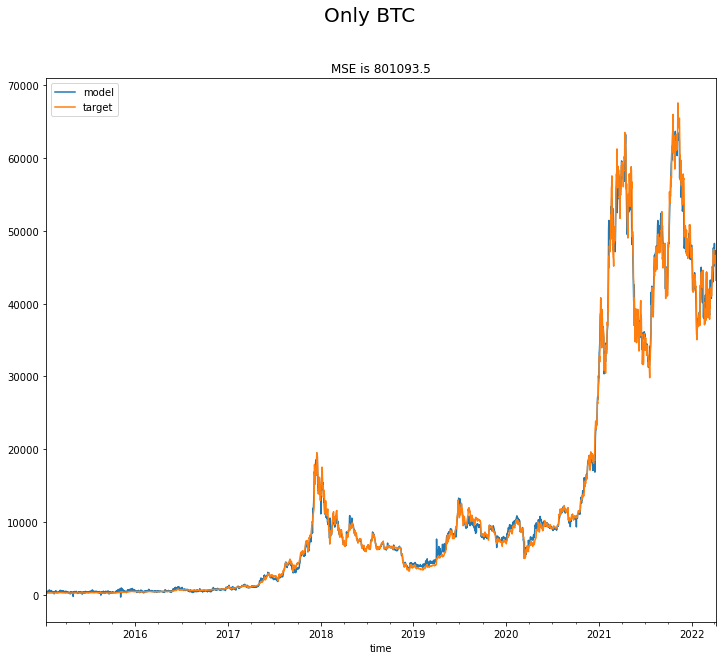

In [44]:
btc_pred = [m.predict(btc_X) for m in btc_model]
btc_res = btc_pred[1] * 0.8 + btc_pred[2] * 0.2 #라쏘의 경우 성능이 좋지 못해 제거했다.
eval_model.visualize_plot(btc_res, btc_y, "Only BTC")


(0.0, 100.0)

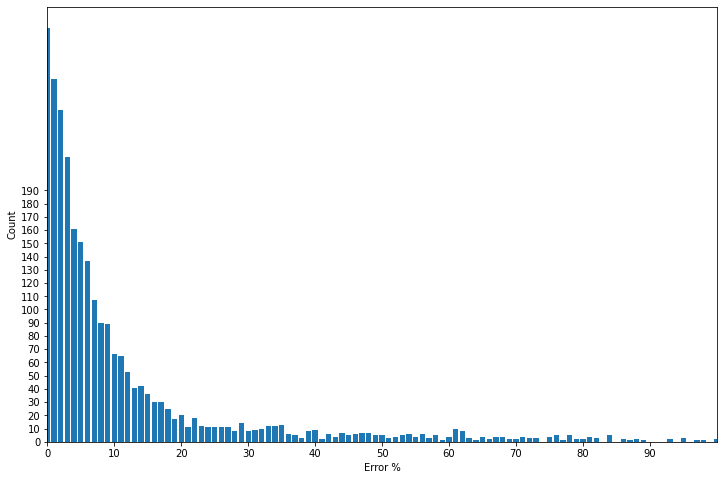

In [45]:
error = abs(btc_y - btc_res) / btc_y * 100
error_mean = error.mean()
error_var = error.var()
error = error.astype(int)
cnts = error.value_counts()
cnts.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(12,8))
plt.bar(cnts.index, cnts.values)
plt.ylabel("Count")
plt.xlabel("Error %")
plt.xticks(range(0,100,10))
plt.yticks(range(0,200,10))
plt.xlim(0,100)

In [46]:
pct_pred = (btc_res - btc_y) / btc_y * 100 #내일 코인이 몇 % 오를지를 계산해준다.

In [55]:
def get_threshold(days=0): #현재로 부터 과거 몇일의 수익
    result = []
    for i in range(-5, 10):
        buy_point = pct_pred[pct_pred > i] #예측 값이 i% 이상 상승을 말하면 매수한다.
        buy_value = btc_y[(btc_y.index).isin(buy_point.index)]
        sell_dates = [df.index.get_loc(i) + 1 for i in buy_value.index[:-1]] #매수 다음날 바로 매도한다.
        profit = (btc_y.iloc[sell_dates] - buy_value.values[:-1]) / buy_value.values[:-1] * 100
        seed = 1000 #처음 seed
        seed_record = [] #profit 저장용
        for p in profit[-days:]:
            seed = seed * (1 + (p / 100))
            seed_record.append(seed)
        result.append((i,seed_record))
    return result
result = get_threshold(100)

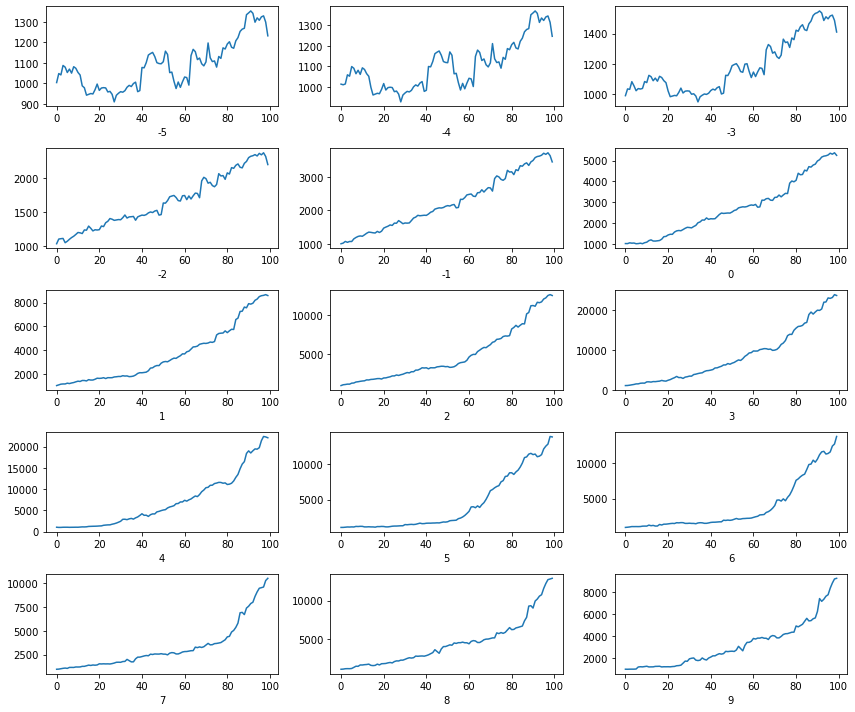

In [56]:
fig,axes = plt.subplots(5,3,figsize=(12,10))
for i, r in enumerate(result, start=1):
    thereshold, value = r
    plt.subplot(5,3,i)
    plt.plot(value)
    plt.xlabel(thereshold)
plt.tight_layout()

3%로 잡는 경우가 가장 수익률이 좋았다.

(18789.0, 19088.0)

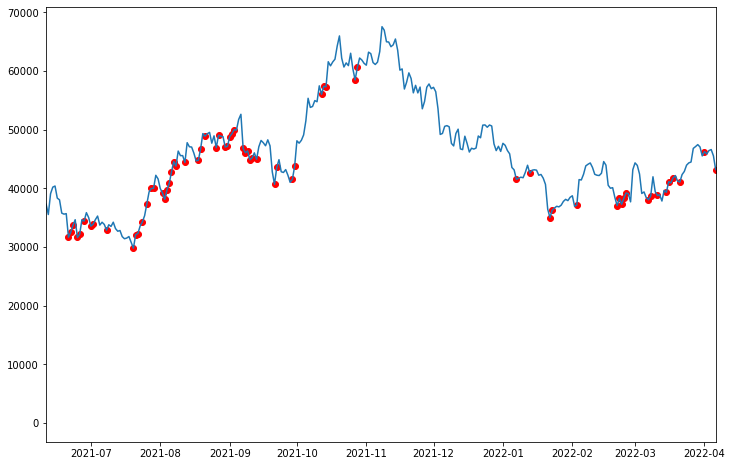

In [57]:
buy_point = pct_pred[pct_pred > 3] #3%이상 오를 것이라고 예측한 날들
buy_value = btc_y[(btc_y.index).isin(buy_point.index)]
plt.figure(figsize=(12,8))
plt.plot(btc_y)
plt.scatter(x=buy_value.index, y = buy_value.values, c='r')
plt.xlim(df.index[-300],df.index[-1])


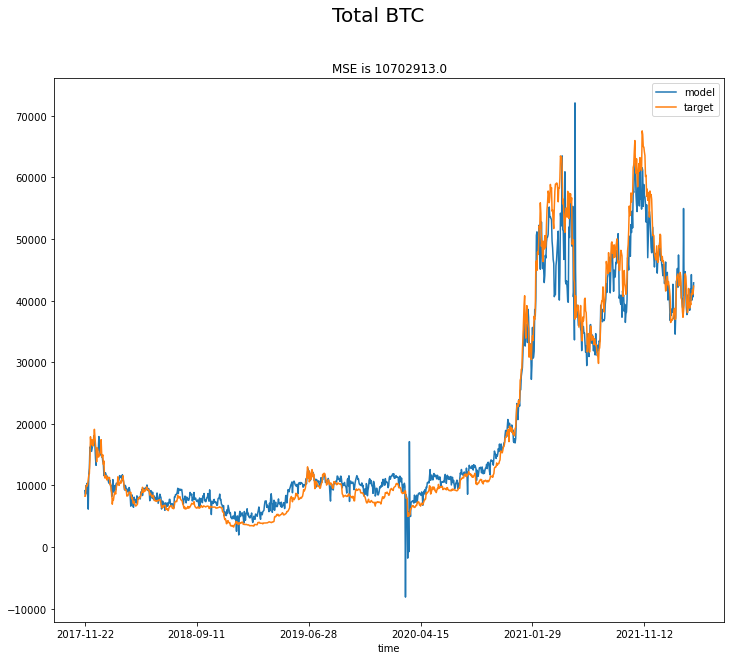

In [35]:
total_pred = [m.predict(total_X) for m in total_model]
total_res = total_pred[0] * 0.1 + total_pred[1] * 0.7 + total_pred[2] * 0.2
eval_model.visualize_plot(total_res, total_y, "Total BTC")


In [58]:
total_pct_pred = (total_res - total_y) / total_y * 100 #예측 값의 상승분

In [60]:
btc_pct_pred = pct_pred[pct_pred.index.isin(total_pct_pred.index)]

In [69]:
pct_df = pd.DataFrame(index=btc_pct_pred.index) #두 모델의 예측 값의 상승분을 저장한 df
pct_df['btc'] = btc_pct_pred.values
pct_df['total'] = total_pct_pred.values


(18589.0, 19088.0)

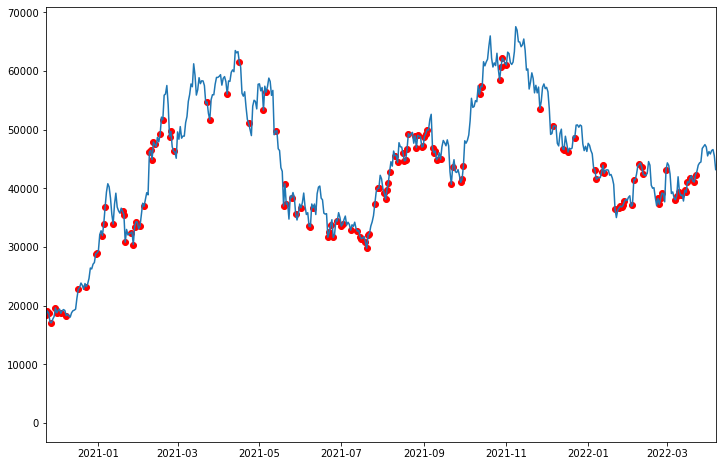

In [102]:
buy_point = pct_df[(pct_df['btc'] > 2) | (pct_df['total'] > 1)] #순수 비트 모델이 3%이상 오를 것이라고 예측한 날들 + 토탈 모델이 1% 이상 오른다고 예측한 날들
buy_value = btc_y[(btc_y.index).isin(buy_point.index)]
plt.figure(figsize=(12,8))
plt.plot(btc_y)
plt.scatter(x=buy_value.index, y = buy_value.values, c='r')
plt.xlim(df.index[-500],df.index[-1])


In [92]:
sell_dates = [btc_y.index.get_loc(i) + 1 for i in buy_value.index[:-1]] #매수 다음날 바로 매도한다.
profit = (btc_y.iloc[sell_dates] - buy_value.values[:-1]) / buy_value.values[:-1] * 100
seed = 1000 #처음 seed
result = [] #profit 저장용
for p in profit[-300:]: #약 지난 300일 간의 수익률
    seed = seed * (1 + (p / 100))
    result.append(seed)


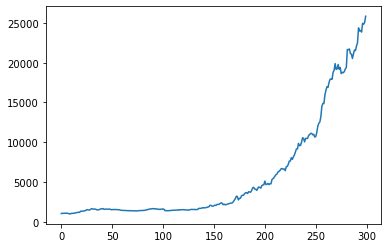

In [94]:
plt.plot(result)

In [95]:
total_profit = (result[-1] - result[0]) / result[0]
total_profit * 100

2419.667715646925